## Phase 4 (Modeling): Feature Selection

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 18](https://data-science.training/kapitel-18/)
* Datum: 23.03.2023

Daten: Versionen 7 und 8

Methode: Naive Bayes

Strategien: FFS, BFE

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf
# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Datenversion festlegen: 7, 8
version  = 8
# Modell-Abkürzung festlegen: nb = Naive Bayes
shortcut = 'nb'
# Feature Selection Strategie festlegen: ffs = Forward Feature Selection, bfe = Backward Feature Elimination
strategy = 'bfe'

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [9]:
# Modell auswählen
#  (KNIME: "XYZ Learner")
model = GaussianNB()

In [10]:
# Feature Selection Strategie auswählen
if strategy == 'ffs':
    fss = SequentialFeatureSelector(model, cv=skf, scoring='accuracy', direction='forward')
elif strategy == 'bfe':  
    fss = SequentialFeatureSelector(model, cv=skf, scoring='accuracy', direction='backward')
else:    
    fss = None
fss.fit(X, y)

SequentialFeatureSelector(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                          direction='backward', estimator=GaussianNB(),
                          scoring='accuracy')

In [11]:
# Ergebnisse
print('Anzahl Features In : ', fss.n_features_in_)
print('Anzahl Features Out: ', fss.n_features_to_select_)
print('Support            : ', fss.support_)

Anzahl Features In :  15
Anzahl Features Out:  8
Support            :  [False False  True  True False  True False  True False False  True  True
  True  True False]


In [12]:
# Reduzierte Trainingsdaten
df_res = df_train.drop(['Survived'], axis=1)
df_res = df_res.filter(df_res.columns[fss.support_])
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FamilySize    891 non-null    int64  
 1   LogFare       891 non-null    float64
 2   Pclass_2      891 non-null    int64  
 3   Embarked_C    891 non-null    int64  
 4   Title_Master  891 non-null    int64  
 5   Title_Miss    891 non-null    int64  
 6   Title_Mr      891 non-null    int64  
 7   Title_Mrs     891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [13]:
# Beschreibende Attribute extrahieren
X_res = df_res.iloc[:,:].values

In [14]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X_res, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 457
* TP (True  Positives) : 259
* FN (False Negatives) : 83
* FP (False Positives) : 92

Gütemaße

* Genauigkeit  (Accuracy)    :   80,35 %
* Spezifität   (Specificity) :   83,24 %
* Sensitivität (Sensitivity) :   75,70 %
* Präzision    (Precision)   :   74,01 %
* Recall       (Recall)      :   75,70 %
* F-Maß        (F Score)     :   74,66 %
* AURC         (AURC)        :   84,50 %
* LogLoss      (LogLoss)     :    0,808

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  78,38 %


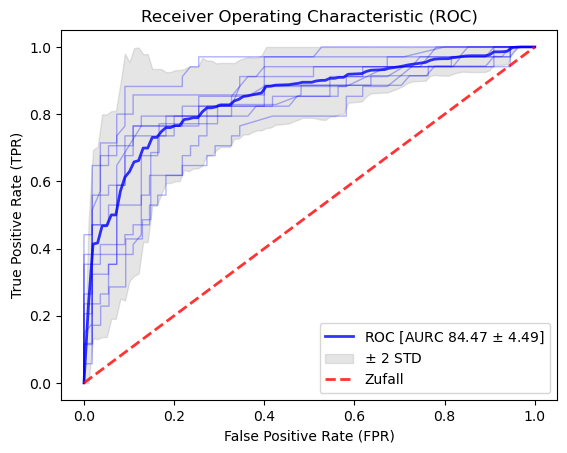

In [15]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X_res, y, cv=skf)

In [16]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X_res, y)

GaussianNB()

In [17]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version) + '_' + str(strategy)
pk.dump(model, open(filename, 'wb'))

In [18]:
# Ausgewählte Features speichern
filename += '_features'
pk.dump(df_res.columns.values, open(filename, 'wb'))

## Ergebnisse

#### Version 7 & Naive Bayes & FFS

8 Features

* Child
* Pclass_2
* Sex_male
* Embarked_Q
* Embarked_S
* Title_Miss
* FamilySizeBinned_Large
* FareBinned_High

Confusion Matrix

* TN (True  Negatives) : 489
* TP (True  Positives) : 245
* FN (False Negatives) : 97
* FP (False Positives) : 60

Gütemaße

* Genauigkeit  (Accuracy)    :   82,37 %
* Spezifität   (Specificity) :   89,07 %
* Sensitivität (Sensitivity) :   71,60 %
* Präzision    (Precision)   :   80,56 %
* Recall       (Recall)      :   71,60 %
* F-Maß        (F Score)     :   75,60 %
* AURC         (AURC)        :   80,16 %
* LogLoss      (LogLoss)     :    0,762

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  79,67 %

#### Version 7 & Naive Bayes & BFE

9 Features

* Pclass_3
* Sex_male
* Title_Master
* Title_Miss
* Title_Mrs
* FamilySizeBinned_Large
* FareBinned_Low
* FareBinned_Medium
* FareBinned_High

Confusion Matrix

* TN (True  Negatives) : 492
* TP (True  Positives) : 246
* FN (False Negatives) : 96
* FP (False Positives) : 57

Gütemaße

* Genauigkeit  (Accuracy)    :   82,82 %
* Spezifität   (Specificity) :   89,62 %
* Sensitivität (Sensitivity) :   71,89 %
* Präzision    (Precision)   :   81,31 %
* Recall       (Recall)      :   71,89 %
* F-Maß        (F Score)     :   76,15 %
* AURC         (AURC)        :   84,39 %
* LogLoss      (LogLoss)     :    0,820

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,17 %

*andere Hardware*

8 Features

* Pclass_3
* Sex_male
* Title_Master
* Title_Miss
* Title_Mrs
* FamilySizeBinned_Large
* FareBinned_Medium
* FareBinned_High

Confusion Matrix

* TN (True  Negatives) : 492
* TP (True  Positives) : 246
* FN (False Negatives) : 96
* FP (False Positives) : 57

Gütemaße

* Genauigkeit  (Accuracy)    :   82,82 %
* Spezifität   (Specificity) :   89,62 %
* Sensitivität (Sensitivity) :   71,89 %
* Präzision    (Precision)   :   81,31 %
* Recall       (Recall)      :   71,89 %
* F-Maß        (F Score)     :   76,15 %
* AURC         (AURC)        :   84,16 %
* LogLoss      (LogLoss)     :    0,814

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,11 %

#### Version 8 & Naive Bayes & FFS

7 Features

* Age
* FamilySize
* Pclass_3
* Embarked_Q
* Title_Miss
* Title_Mr
* Title_Rare

Confusion Matrix

* TN (True  Negatives) : 482
* TP (True  Positives) : 246
* FN (False Negatives) : 96
* FP (False Positives) : 67

Gütemaße

* Genauigkeit  (Accuracy)    :   81,70 %
* Spezifität   (Specificity) :   87,79 %
* Sensitivität (Sensitivity) :   71,90 %
* Präzision    (Precision)   :   78,79 %
* Recall       (Recall)      :   71,90 %
* F-Maß        (F Score)     :   75,04 %
* AURC         (AURC)        :   82,25 %
* LogLoss      (LogLoss)     :    0,658

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  79,45 %

#### Version 8 & Naive Bayes & FBE

8 Features

* FamilySize
* LogFare
* Pclass_2
* Embarked_C
* Title_Master
* Title_Miss
* Title_Mr
* Title_Mrs

Confusion Matrix

* TN (True  Negatives) : 457
* TP (True  Positives) : 259
* FN (False Negatives) : 83
* FP (False Positives) : 92

Gütemaße

* Genauigkeit  (Accuracy)    :   80,35 %
* Spezifität   (Specificity) :   83,24 %
* Sensitivität (Sensitivity) :   75,70 %
* Präzision    (Precision)   :   74,01 %
* Recall       (Recall)      :   75,70 %
* F-Maß        (F Score)     :   74,66 %
* AURC         (AURC)        :   84,50 %
* LogLoss      (LogLoss)     :    0,808

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  78,38 %

*andere Hardware*

7 Features

* FamilySize
* LogFare
* Embarked_C
* Title_Master
* Title_Miss
* Title_Mr
* Title_Mrs

Confusion Matrix

* TN (True  Negatives) : 458
* TP (True  Positives) : 260
* FN (False Negatives) : 82
* FP (False Positives) : 91

Gütemaße

* Genauigkeit  (Accuracy)    :   80,58 %
* Spezifität   (Specificity) :   83,42 %
* Sensitivität (Sensitivity) :   75,99 %
* Präzision    (Precision)   :   74,30 %
* Recall       (Recall)      :   75,99 %
* F-Maß        (F Score)     :   74,96 %
* AURC         (AURC)        :   84,93 %
* LogLoss      (LogLoss)     :    0,809

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  78,69 %